# <center> Ejemplo de Análisis exploratorio de datos con Pandas (traducción del original escrito por [Yury Kashnitsky](https://yorko.github.io)) </center>


A continuación, se recoge un ejemplo guiado donde se va realizando un análisis de datos a la vez que aprovecha para introducirte a Pandas. Evidentemente, en un EDA, la parte instructiva de cómo se hacen las cosas en Pandas no habría que ponerla, simplemente está en este ejemplo para ayudar al lector, por eso he decidido dejaros este ejemplo aquí.

En este ejemplo, el estudio será sobre el "churn" de una empresa de telecomunicaciones, donde el "churn rate" o tasa de cancelación es el porcentaje de clientes o suscriptores que dejan de utilizar los servicios que ofrece una empresa durante un período de tiempo determinado



<center><img align="center" src="https://habrastorage.org/files/10c/15f/f3d/10c15ff3dcb14abdbabdac53fed6d825.jpg"  width=50% /></center>

<br>


## 1.Demostración de los principales métodos de Pandas


**[Pandas](http://pandas.pydata.org)** es una biblioteca de Python que proporciona amplios medios para el análisis de datos. Los científicos de datos a menudo trabajan con datos almacenados en formatos de tabla como `.csv`,` .tsv` o `.xlsx`. Pandas hace que sea muy conveniente cargar, procesar y analizar dichos datos tabulares mediante consultas similares a SQL. Junto con `Matplotlib` y` Seaborn`, `Pandas` proporciona una amplia gama de oportunidades para el análisis visual de datos tabulares.

Las principales estructuras de datos en `Pandas` se implementan con las clases **Series** y **DataFrame**. El primero es una matriz indexada unidimensional de algún tipo de datos fijo. Este último es una estructura de datos bidimensional, una tabla, donde cada columna contiene datos del mismo tipo. Puede verlo como un diccionario de instancias de "Series". Los `DataFrames` son excelentes para representar datos reales: las filas corresponden a instancias (ejemplos, observaciones, etc.) y las columnas corresponden a características de estas instancias.

In [230]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 3)

Demostraremos los métodos principales en acción analizando un [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) sobre la tasa de abandono de los clientes de los operadores de telecomunicaciones. Leamos los datos (usando `read_csv`) y echemos un vistazo a las primeras 5 líneas usando el método` head`:

In [231]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### *Acerca de la impresión de DataFrames en Jupyter notebook

En los Jupyter notebooks, los DataFrames de Pandas se imprimen como esas bonitas tablas que se ven arriba, mientras que `print(df.head())`... Digamos que no tiene un formato tan bonito.

Por defecto, Pandas despliega 20 columnas y 60 renglones. Si el tamaño de tus datos es más grande, usa la función `set_option` como en el ejemplo que se muestra abajo.

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```






Veamos la dimensionalidad de los datos, los nombres de las columnas y los tipos de estas.


In [232]:
print(df.shape)

(3333, 20)


En la salida, podemos ver que la tabla contiene 3333 filas y 20 columnas.

Ahora intentemos imprimir los nombres de las columnas usando `columns`:

In [233]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


Podemos usar el método `info()` para generar información general sobre el marco de datos:


In [234]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

`bool`, `int64`, `float64` and `object` son los tipos de datos de nuestras funciones. Vemos que una característica es lógica
 (`bool`), 3 características son de tipo `object`, y 16 son numéricas. Con este mismo método, podemos ver fácilmente si faltan valores. Aquí, no hay ninguno porque cada columna contiene 3333 observaciones, el mismo número de filas que vimos antes con `shape`.


Podemos **cambiar el tipo de columna** con el método `astype`. Apliquemos este método a la varaible `Churn` para convertirlo en un valor entero, ya que solo podrá valer 1 o 0:

In [235]:
df['Churn'] = df['Churn'].astype('int64')

El método `describe` muestra las características estadísticas básicas de cada varaible numérica (tipos `int64` y `float64`): número de valores no nulos, media, desviación estándar, rango, mediana y cuartiles de 0,25 y 0,75.

In [236]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000
mean,101.065,437.182,8.099,179.775,100.436,30.562,200.980,100.114,17.084,200.872,100.108,9.039,10.237,4.479,2.765,1.563,0.145
std,39.822,42.371,13.688,54.467,20.069,9.259,50.714,19.923,4.311,50.574,19.569,2.276,2.792,2.461,0.754,1.315,0.352
min,1.000,408.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,23.200,33.000,1.040,0.000,0.000,0.000,0.000,0.000
25%,74.000,408.000,0.000,143.700,87.000,24.430,166.600,87.000,14.160,167.000,87.000,7.520,8.500,3.000,2.300,1.000,0.000
50%,101.000,415.000,0.000,179.400,101.000,30.500,201.400,100.000,17.120,201.200,100.000,9.050,10.300,4.000,2.780,1.000,0.000
75%,127.000,510.000,20.000,216.400,114.000,36.790,235.300,114.000,20.000,235.300,113.000,10.590,12.100,6.000,3.270,2.000,0.000
max,243.000,510.000,51.000,350.800,165.000,59.640,363.700,170.000,30.910,395.000,175.000,17.770,20.000,20.000,5.400,9.000,1.000


Para ver estadísticas sobre variables no numéricas, es necesario indicar explícitamente los tipos de datos de interés en el parámetro `include`.

In [237]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [238]:
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
ID     73
VT     73
MI     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NC     68
NJ     68
CO     66
NV     66
WA     66
RI     65
MS     65
MA     65
AZ     64
FL     63
MO     63
ME     62
ND     62
NM     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

Para características categóricas (tipo `object`) y booleanas (tipo `bool`) podemos usar el método `value_counts`. Echemos un vistazo a la distribución de `Churn`:


In [239]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 usuarios de 3333 son *leales*; ya que su valor de "Churn" es "0". Para calcular fracciones, utilizamos el parámetro `normalize = True` en la función `value_counts`.


In [240]:
df['Churn'].value_counts(normalize=True)

0    0.855
1    0.145
Name: Churn, dtype: float64


### Clasificación

Un DataFrame se puede ordenar por el valor de una de las variables (es decir, columnas). Por ejemplo, podemos ordenar por 'Total day charge' (ascending = False) para colocar los registros en orden descendente):



In [243]:
df.sort_values(by=['Area code', 'Total day charge'], ascending=[False, True]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1397,VT,101,510,No,No,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0
2736,OK,127,510,No,Yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
3046,MI,110,510,No,No,0,18.9,92,3.21,258.4,81,21.96,109.6,74,4.93,14.8,4,4.00,1,0
1621,SC,138,510,No,Yes,21,19.5,149,3.32,140.9,109,11.98,179.7,111,8.09,7.9,1,2.13,0,0
1531,DE,138,510,Yes,No,0,46.5,104,7.91,186.0,114,15.81,167.5,95,7.54,9.6,4,2.59,4,1


También podemos ordenar por múltiples columnas:

In [245]:
df.sort_values(by=['Churn', 'Total day charge'], ascending=[False, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


### Indexación y recuperación de datos

Un DataFrame se puede indexar de diferentes formas.

Para obtener una sola columna, puede usar la sintaxis `DataFrame ['Name']`. Usemos esto para responder a una pregunta sobre esa columna solamente: **¿Cuál es la proporción de cancelación de los datos que tenemos?**

In [246]:
df['Churn'].mean()

0.14491449144914492

El 14,5% es bastante malo para una empresa; ya que una tasa de abandono tan elevada puede llevar a la empresa a la quiebra.

**La indexación booleana** (o filtrado de datos) con una columna es muy conveniente. La sintaxis es `df[P(df['Nombre'])]`, donde `P` es una condición lógica que se comprueba para cada elemento de la columna `Nombre`. El resultado de dicha indexación es el DataFrame que consta solo de filas que satisfacen la condición "P" en la columna "Nombre".

Usémoslo para responder la pregunta:

**¿Cuáles son los valores promedio de las características numéricas para los usuarios que se han dado de baja?**

In [247]:
df[df['Churn'] == 1].mean()

Account length            102.665
Area code                 437.818
Number vmail messages       5.116
Total day minutes         206.914
Total day calls           101.335
Total day charge           35.176
Total eve minutes         212.410
Total eve calls           100.561
Total eve charge           18.055
Total night minutes       205.232
Total night calls         100.400
Total night charge          9.236
Total intl minutes         10.700
Total intl calls            4.164
Total intl charge           2.890
Customer service calls      2.230
Churn                       1.000
dtype: float64

**¿Cuánto tiempo (en promedio) pasan durante el día en el teléfono los usuarios que han terminado dándose de baja?**

In [248]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

¿Y si investigamos un poco más sobre cómo se distribuyen en comparación con los que se mantienen leales?


In [250]:
df[df['Churn'] == 1]['Total day minutes'].mean(), df[df['Churn'] == 1]['Total day minutes'].std()

(206.91407867494814, 68.9977915375872)

In [251]:
df[df['Churn'] == 0]['Total day minutes'].mean(), df[df['Churn'] == 0]['Total day minutes'].std()

(175.17575438596492, 50.18165518287505)

Podemos comparar las 2:

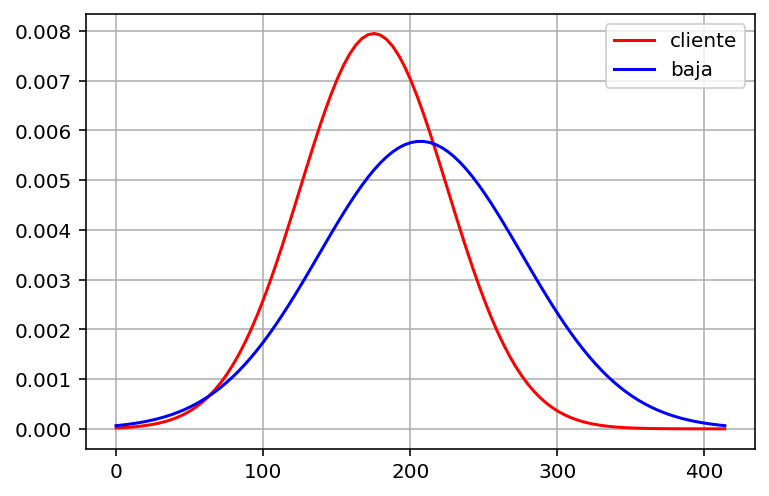

In [252]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

mean0 = df[df['Churn'] == 0]['Total day minutes'].mean()
std0 = df[df['Churn'] == 0]['Total day minutes'].std()
mean1 = df[df['Churn'] == 1]['Total day minutes'].mean()
std1 = df[df['Churn'] == 1]['Total day minutes'].std()

x_min = 0
x_max = max(mean0, mean1)*2


x0 = np.linspace(x_min, x_max, 100)
y0 = scipy.stats.norm.pdf(x0,mean0,std0)
x1 = np.linspace(x_min, x_max, 100)
y1 = scipy.stats.norm.pdf(x1,mean1,std1)

plt.plot(x0,y0, color='red', label='cliente')
plt.plot(x1,y1, color='blue', label='baja')

plt.grid()
plt.legend()


**¿Cuál es la duración máxima de las llamadas internacionales entre los usuarios leales (`Churn == 0`) que no tienen un plan internacional?**



In [256]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

Los DataFrames se pueden indexar por nombre de columna (etiqueta) o nombre de fila (índice) o por el número de posición de una fila. El método `loc` se usa para **indexar por nombre**, mientras que `iloc ()` se usa para **indexar por número**.

A continuación, utilizaremos ambas notaciones. En el primer caso, decimos *"danos los valores de las filas con índice de 0 a 5 (inclusive) y las columnas etiquetadas 
de estado a código de área (inclusive)"*. En el segundo caso, decimos *"danos los valores de las primeras cinco filas en las primeras tres columnas"* (como en un segmento típico de Python: el valor máximo no está incluido).

In [154]:
df.loc[0:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [155]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


Si necesitamos la primera o la última línea del marco de datos, podemos usar df [: 1] o df [-1:]:


In [156]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


### Aplicar funciones a celdas, columnas y filas


**Para aplicar funciones a cada columna, usamos `apply() `:**


In [257]:
df.apply(np.max) 

State                       WY
Account length             243
Area code                  510
International plan         Yes
Voice mail plan            Yes
Number vmail messages       51
Total day minutes          351
Total day calls            165
Total day charge          59.6
Total eve minutes          364
Total eve calls            170
Total eve charge          30.9
Total night minutes        395
Total night calls          175
Total night charge        17.8
Total intl minutes          20
Total intl calls            20
Total intl charge          5.4
Customer service calls       9
Churn                        1
dtype: object

El método `apply` también se puede utilizar para aplicar una función a cada fila. Para hacer esto, especificamos `axis = 1`. Las funciones Lambda son muy convenientes en tales escenarios. Por ejemplo, si necesitamos seleccionar todos los estados que comienzan con W, podemos hacerlo así:

In [258]:
df[df['State'].apply(lambda state: state[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


El método `map` se puede utilizar para **reemplazar valores en una columna** pasando un diccionario con el formato `{valor_antiguo: valor_nuevo}` como argumento:

In [259]:
d = {'No' : False, 'Yes' : True}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [260]:
df = df.replace({'Voice mail plan': d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0



### Agrupación

En general, la agrupación de datos en Pandas funciona de la siguiente manera:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```

1. Primero, el método `groupby` divide las `grouping_columns` por sus valores. Se convierten en un nuevo índice en el DataFrame resultante.
2. Luego, se seleccionan las columnas de interés (`column_to_show`). Si no se incluye en `column_to_show`, se incluirán todas las posibles combinaciones que no sean groupby.
3. Finalmente, se aplica una o varias funciones a los grupos obtenidos por columnas seleccionadas.

A continuación, se muestra un ejemplo en el que agrupamos los datos de acuerdo con los valores de la variable `Churn` y mostramos las estadísticas de tres columnas en cada grupo:

In [263]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                                     Total eve minutes  \
                  count     mean     std  min    50%    max             count   
Churn                                                                           
0                2850.0  175.176  50.182  0.0  177.2  315.6            2850.0   
1                 483.0  206.914  68.998  0.0  217.6  350.8             483.0   

                                           Total night minutes           \
          mean     std   min    50%    max               count     mean   
Churn                                                                     
0      199.043  50.292   0.0  199.6  361.8              2850.0  200.133   
1      212.410  51.729  70.9  211.3  363.7               483.0  205.232   

                                    
          std   min     50%    max  
Churn                               
0      51.105  23.2  200.25  395.0  
1      47.133  47.4  204.80  354.9

Hagamos lo mismo, pero ligeramente diferente pasando una lista de funciones a `agg ()`:

In [162]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9


### Tabla de resumen

Supongamos que queremos ver cómo se distribuyen las observaciones de nuestra muestra en el contexto de dos variables: "Churn" e "International plan". Para hacerlo, podemos construir una **tabla de contingencia** usando el método `crosstab` (similar a una pivot_table).


In [265]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [268]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.602,0.253
1,0.121,0.024


Podemos ver que la mayoría de los usuarios son leales y no utilizan servicios adicionales (Plan Internacional / Buzón de voz).

Esto se parecerá a las **tablas dinámicas** típicas de Excel. Y, por supuesto, las tablas dinámicas se implementan en Pandas: el método `pivot_table` toma los siguientes parámetros:

* `valores` - una lista de variables para calcular estadísticas,
* `Index` - una lista de variables para agrupar datos,
* `aggfunc` - qué estadísticas necesitamos calcular para los grupos, ej. suma, media, máxima, mínima o algo más.

Echemos un vistazo a la cantidad promedio de llamadas diurnas, vespertinas y nocturnas por código de área:

In [224]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Area code'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


También podríamos replicar el crosstab (con un apaño):

In [178]:
df[['Churn', 'International plan', 'Total day minutes']].pivot_table(index=["Churn"], columns=['International plan'], aggfunc='count')

Total day minutes      
International plan             False True 
Churn                                     
0                               2664   186
1                                346   137


### Transformaciones de DataFrame

Por ejemplo, si queremos calcular el número total de llamadas para todos los usuarios, podemos crear la serie `total_calls` y pegarla al DataFrame:


In [179]:
total_calls = df['Total day calls'] + df['Total eve calls'] + \
              df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns), column='Total calls', value=total_calls)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


Es posible agregar una columna más fácilmente sin crear una instancia de Serie intermedia:

In [181]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + \
                     df['Total night charge'] + df['Total intl charge']
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


Para eliminar columnas o filas, usamos el método `drop`, pasando los índices requeridos y el parámetro ´axis´ (`1` si elimina columnas, y nada o `0` si elimina filas). El argumento `inplace` indica si se debe cambiar el DataFrame original. Con `inplace = False`, el método `drop` no cambia el DataFrame existente y devuelve uno nuevo con filas o columnas eliminadas. Con `inplace = True`, altera el DataFrame

In [182]:
df.drop(['Total charge', 'Total calls'], axis=1, inplace=True) 
df.drop([1, 2]).head() 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## 2. Primer intento de predecir el abandono de los clientes


Veamos cómo se relaciona la tasa de abandono con la variable *International plan*. Podemos hacer esto usando una tabla de contingencia de "crosstab":


In [183]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


A continuación, el ejemplo utiliza Seaborn, para los gráficos. Sin embargo, podremos realizar estos o algunos similares que nos permitan compartir la información de manera similar, mediante Matplotlib. Seaborn lo veremos más adelante en este bloque si nos da tiempo.

In [184]:
# Algunas importaciones para configurar el trazado

import matplotlib.pyplot as plt
# pip instalar seaborn 
import seaborn as sns
# Los gráficos en formato retina son más nítidos y legibles

%config InlineBackend.figure_format = 'retina'

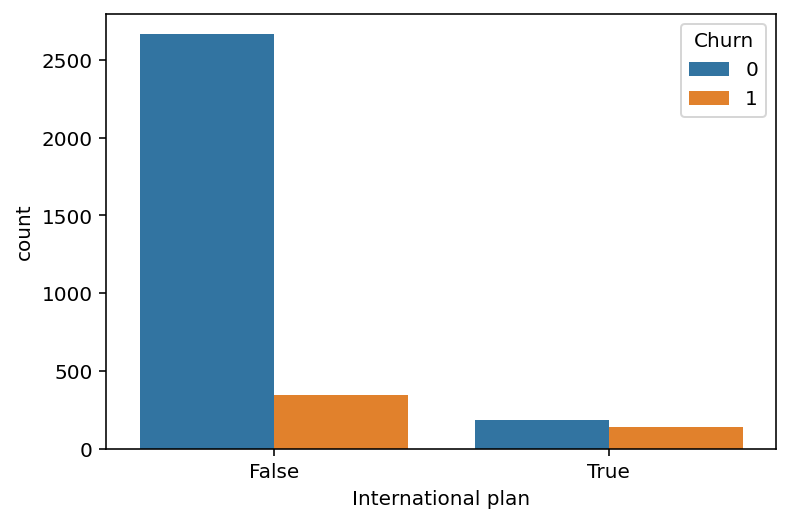

In [185]:
sns.countplot(x='International plan', hue='Churn', data=df);


Vemos que, con *International plan*, la tasa de abandono es mucho mayor, ¡lo cual es una observación interesante! Quizás los gastos grandes y mal controlados con las llamadas internacionales son muy propensos a conflictos y generan insatisfacción entre los clientes del operador de telecomunicaciones.

A continuación, veamos otra característica importante: *Customer service calls*. Hagamos también una tabla resumen y una gráfica.

In [238]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


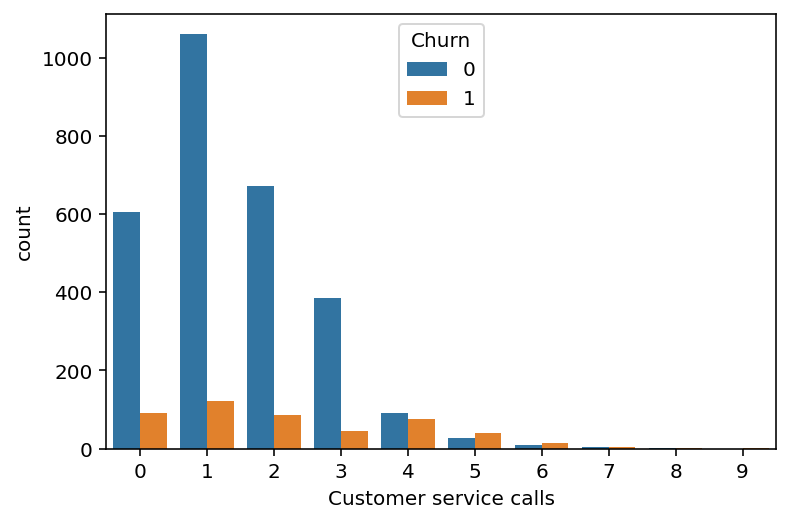

In [239]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

Eso está hecho con Seaborn, pero podríamos replicarlo con Matplotlib:

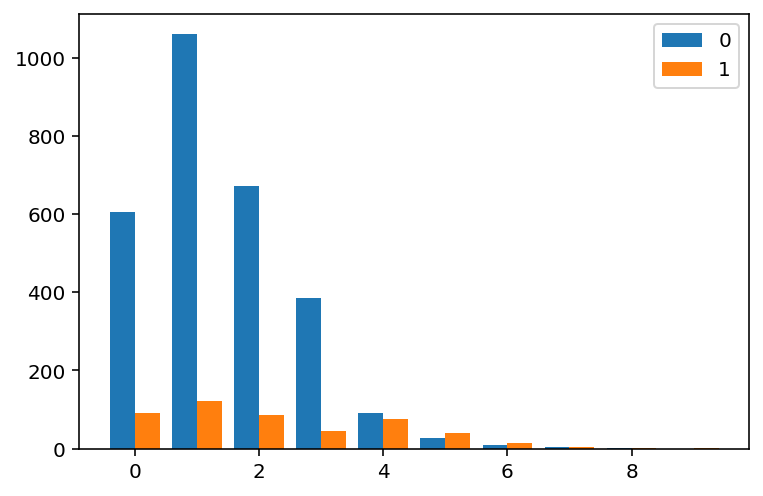

In [275]:
df_plot = df.groupby(['Customer service calls', 'Churn']).agg({"Churn": 'count'})
y0 = df[df['Churn']==0]['Customer service calls'].value_counts().sort_index()
y1 = df[df['Churn']==1]['Customer service calls'].value_counts().sort_index()

# Truquillo para grouped bars:
bar_width = 0.4

plt.bar(y0.index - bar_width/2, y0, label='0', width=bar_width)
plt.bar(y1.index + bar_width/2, y1, label='1', width=bar_width)


plt.legend()

Aunque no es tan obvio en la tabla de resumen, es fácil ver en el gráfico anterior que la tasa de abandono aumenta considerablemente a partir de 4 llamadas al servicio al cliente o más.

Ahora agreguemos una variable binaria a nuestro DataFrame: `Many_service_calls`, que medirá si las "Customer service calls" son superiores a 3 o no. Y una vez más, veamos cómo se relaciona con la deserción.

In [213]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


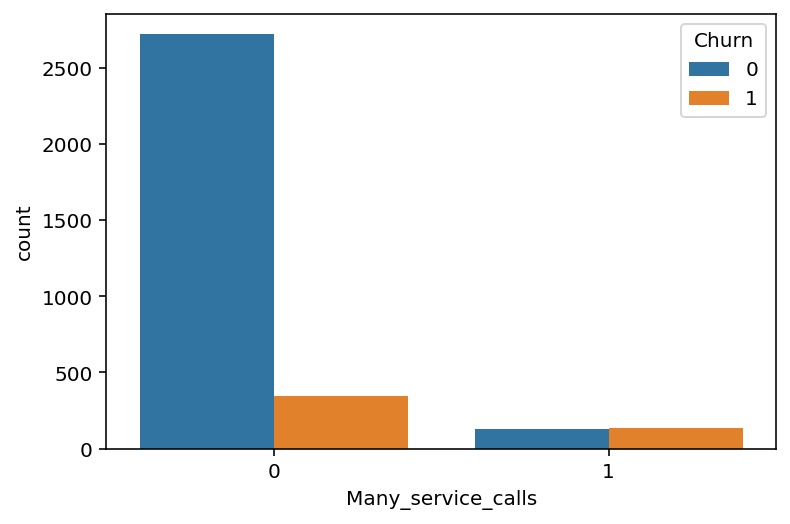

In [214]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);

Construyamos otra tabla de contingencia que relacione *Churn* con *International plan* y la recién creada *Many_service_calls*.

In [215]:
pd.crosstab(df['Many_service_calls'] & df['International plan'] , df['Churn'])

Churn,0,1
row_0,,
False,2841,464
True,9,19


Por lo tanto, podríamos predecir que un cliente no es leal (*Churn* = 1) en el caso de que el número de llamadas al centro de servicio sea mayor a 3 y se agregue el *International plan* (y predecir *Churn* = 0 en caso contrario). En vista de los datos, podríamos esperar una precisión del 85,8% (solo nos equivocamos 464 + 9 veces). Este número, 85,8%, que obtuvimos a través de este razonamiento muy simple, sirve como un buen punto de partida para los modelos de aprendizaje automático adicionales que crearemos.


Recapitulemos lo que hemos cubierto:
    
- La cuota de clientes fieles de la muestra es del 85,5%. El modelo más ingenuo que siempre predice un "cliente leal" en esos datos acertará en aproximadamente el 85,5% de todos los casos. Es decir, la proporción de respuestas correctas (*precisión*) de los modelos subsiguientes no debería ser menor que este número y, con suerte, será significativamente mayor
- Con la ayuda de un pronóstico simple que se puede expresar mediante la siguiente fórmula: "International plan = Verdadero y llamadas de servicio al cliente> 3 => Churn = 1, de lo contrario Churn = 0", podemos esperar una tasa de conjetura del 85,8%, que está apenas por encima del 85,5%
- **Antes de entrenar modelos complejos, se recomienda manipular un poco los datos, hacer algunos gráficos y verificar suposiciones simples.** Además, en las aplicaciones comerciales de aprendizaje automático, generalmente comienzan con soluciones simples y luego experimentan con otras más complejas.


## EXTRA

Hasta aquí el primer ejemplo que hemos recogido para mostrar un análisis exploratorio de datos. Sin embargo, hay una herramienta muy chula de Python que nos automatiza todo este estudio para hacerlo con un par de líneas de código: 'padas profiling'. Como podrás observar si la inspeccionas, nos ofrece un buen primer análisis para conocer nuestros datos, auqnue para hacer cosas más particulares que realmente aporten al EDA, deberemos bajar nosotros al barro, ya sea mediante puro código Python o a través de una mezcla de Python y herramientas de BI, como Power BI.

A continuación, te dejo un enlace a un artículo web muy breve donde te dice cómo instalar esta librería:
https://medium.com/saturdays-ai/an%C3%A1lisis-exploratorio-de-datos-con-pandas-profiling-cf13e0e4a8f5